<a href="https://colab.research.google.com/github/FoozBarakat/Chicago_Crime_Analysis/blob/main/Chicago_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Crime Analysis

In [1]:
import glob
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Week 4: Explanatory Data Viz/Chicago Crime Data'

all_files = glob.glob(os.path.join(folder_path, '*.csv'))

df_list = []

for file in all_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

In [3]:
df = pd.concat(df_list, ignore_index=True)

In [4]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970


## Topic 1) Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

In [6]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  Year                  int32         
dtypes: bool(2), datetime64[ns](1), float64(4), int32(1), int64(2), object(3)
memory usage: 632.6+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001


In [7]:
df_2022 = df[df['Year'] == 2022]

In [8]:
district_2022 = df_2022.groupby('District')['ID'].count().reset_index(name='Crime_Count')
district_2022.head(3)

,District,Crime_Count
0,1.0,13044
1,2.0,11793
2,3.0,11937


In [9]:
district_2022.isna().sum().sum()

0

In [10]:
max_crimes = district_2022['Crime_Count'].max()
print('The district had the most crimes in 2022:')

filter_max = (district_2022['Crime_Count'] == max_crimes)
district_2022[filter_max]

The district had the most crimes in 2022:


,District,Crime_Count
7,8.0,14805


In [11]:
min_crimes = district_2022['Crime_Count'].min()
print('The district had the least crimes in 2022:')

filter_min = (district_2022['Crime_Count'] == min_crimes)
district_2022[filter_min]

The district had the least crimes in 2022:


,District,Crime_Count
22,31.0,15


In [12]:
max_index = district_2022['Crime_Count'].idxmax()
min_index = district_2022['Crime_Count'].idxmin()

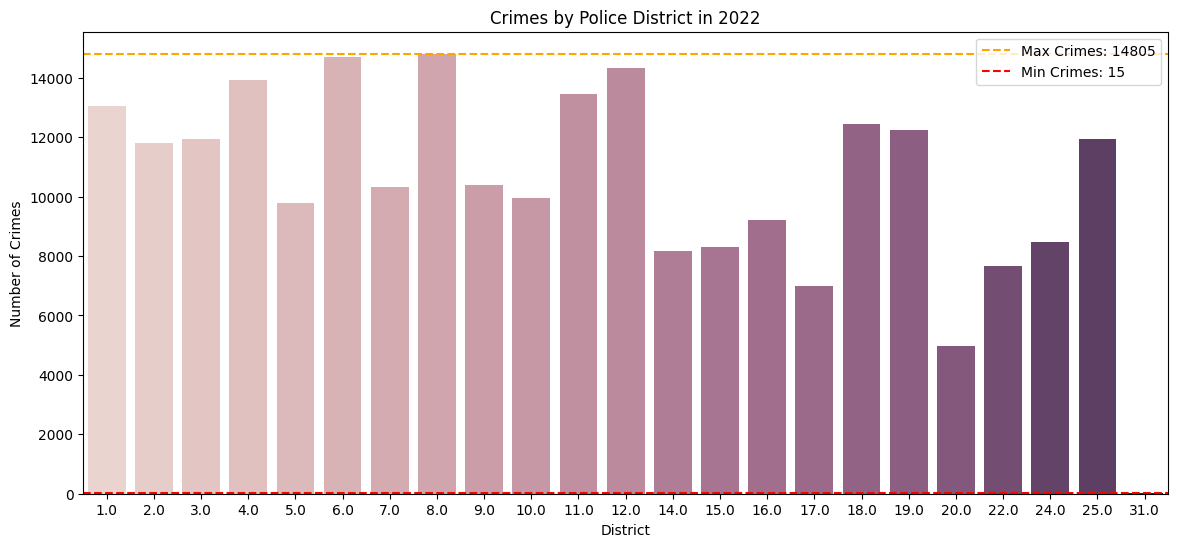

In [13]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=district_2022, x='District', y='Crime_Count', hue='District', legend=False)

plt.axhline(y=max_crimes, color='orange', linestyle='--', label=f'Max Crimes: {max_crimes}')
plt.axhline(y=min_crimes, color='red', linestyle='--', label=f'Min Crimes: {min_crimes}')
plt.legend()

plt.title('Crimes by Police District in 2022')
plt.xlabel('District')
plt.ylabel('Number of Crimes')

plt.show()

## Topic 2) Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [14]:
crimes_by_year = df.groupby('Year')['ID'].count().reset_index(name='Total_Crimes')
crimes_by_year.head()

,Year,Total_Crimes
0,2001,485886
1,2002,486807
2,2003,475985
3,2004,469422
4,2005,453773


In [15]:
crimes_by_year.isna().sum().sum()

0

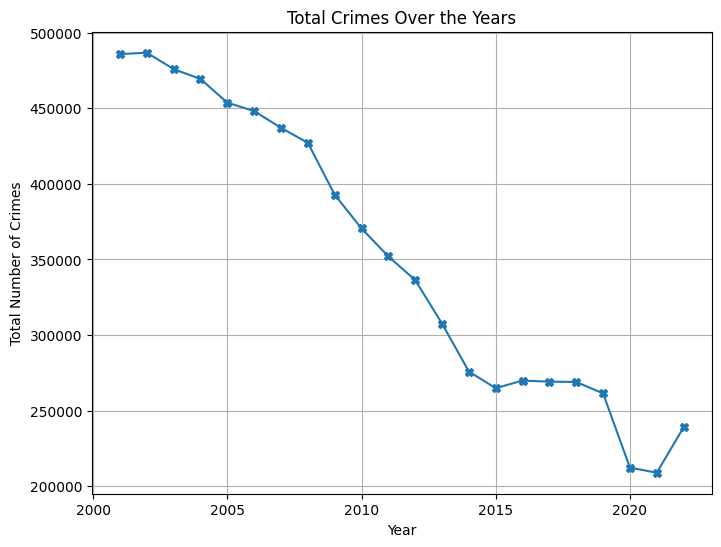

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(crimes_by_year['Year'], crimes_by_year['Total_Crimes'], marker='X', label='Total Crimes')

plt.title('Total Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid()
plt.show()

- `It looks like that the overall crimes are decreasing over the years.`

In [17]:
crimes_by_type = df.groupby(['Year', 'Primary Type'])['ID'].count().reset_index(name='Crime_Count')
crimes_by_type.head(3)

,Year,Primary Type,Crime_Count
0,2001,ARSON,1011
1,2001,ASSAULT,31384
2,2001,BATTERY,93461


In [18]:
crimes_by_type.isna().sum().sum()

0

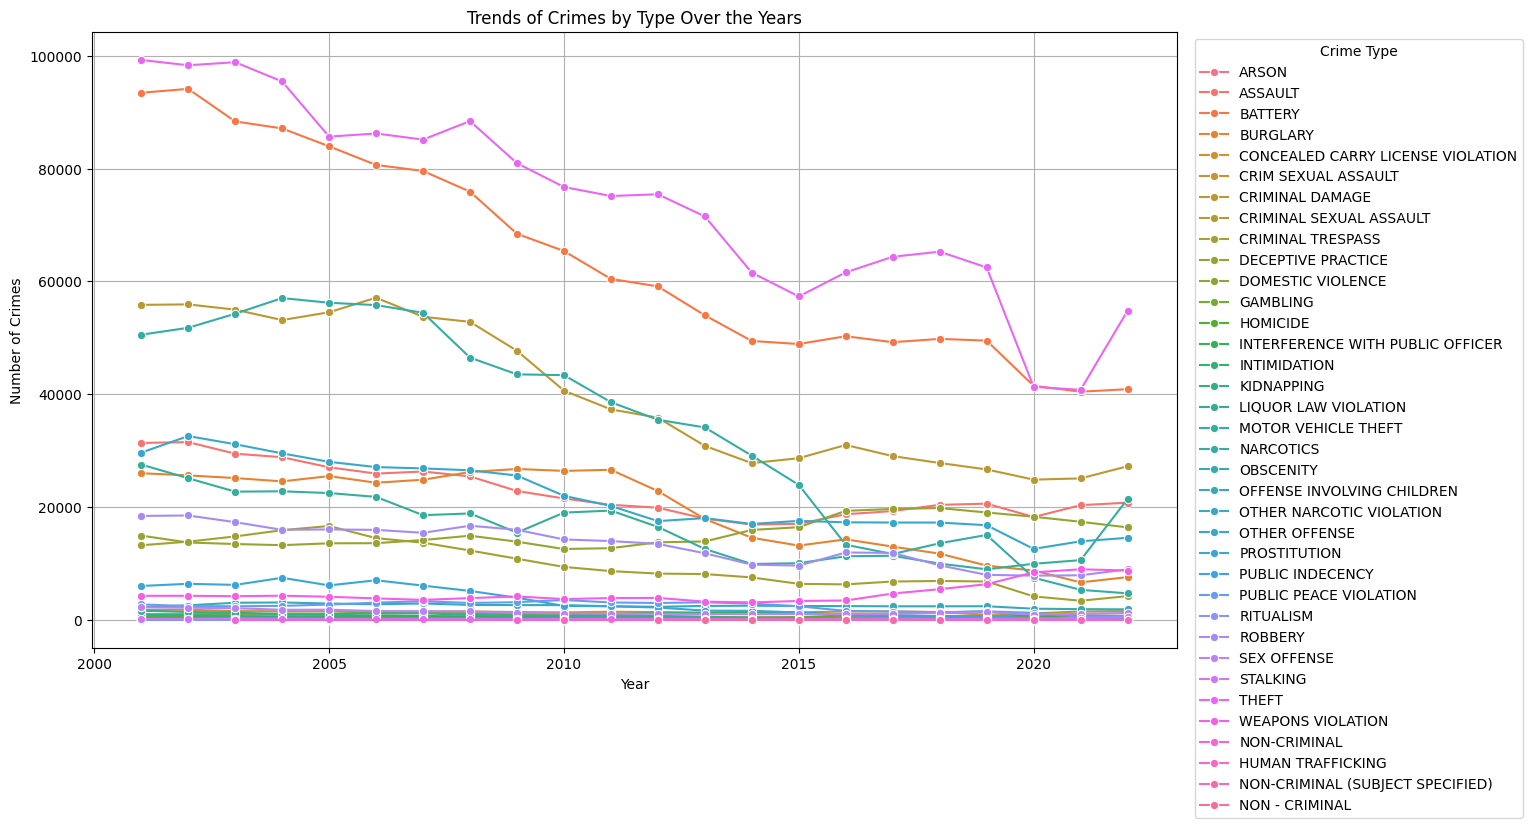

In [19]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=crimes_by_type, x='Year', y='Crime_Count', hue='Primary Type', marker='o')

plt.title('Trends of Crimes by Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

- Total Trend: Most crimes show a decreasing trend over the years.
- Opposite Trend: Some crime types, such as narcotics and domestic violence, remain stable or slightly increase in certain years, while overall crimes decrease.

## Topic 3) Comparing AM vs. PM Rush Hour:
- `Are crimes more common during AM rush hour or PM rush hour?`
- You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
- You can consider any crime that occurred between 4 - 7 PM as PM rush hour.
- Answer the question: What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Answer the question: Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?


In [22]:
df['Hour'] = df['Date'].dt.hour
df.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,Hour
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001,1
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001,13
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001,13


In [25]:
df['AM_Rush'] = df['Hour'].between(7, 10)  # 7 AM to 10 AM
df['PM_Rush'] = df['Hour'].between(16, 19)  # 4 PM to 7 PM
df.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,Hour,AM_Rush,PM_Rush
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001,1,False,False
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,2001,13,False,False
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,2001,13,False,False


In [26]:
am_rush_crimes = df[df['AM_Rush']]
pm_rush_crimes = df[df['PM_Rush']]

total_am_crimes = am_rush_crimes.shape[0]
total_pm_crimes = pm_rush_crimes.shape[0]

print("Total AM Rush Hour Crimes:", total_am_crimes)
print("Total PM Rush Hour Crimes:", total_pm_crimes)

Total AM Rush Hour Crimes: 1097647
Total PM Rush Hour Crimes: 1641051


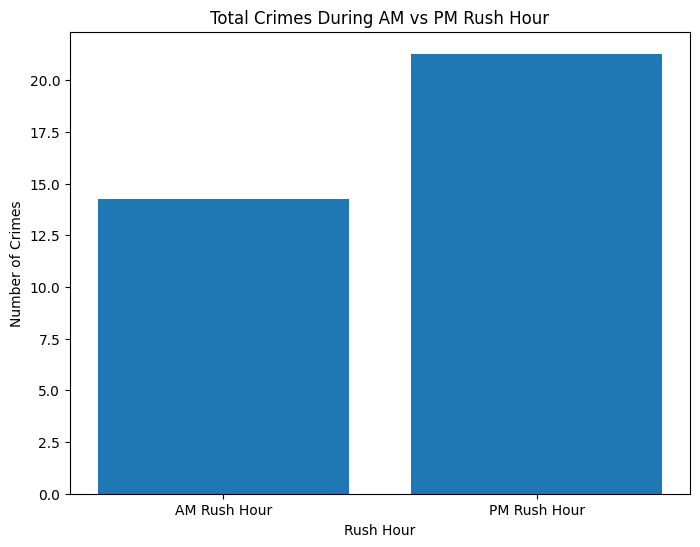

In [39]:
totals = [total_am_crimes/df.shape[0]*100, total_pm_crimes/df.shape[0]*100]
labels = ['AM Rush Hour', 'PM Rush Hour']

plt.figure(figsize=(8, 6))
plt.bar(labels, totals)

plt.title('Total Crimes During AM vs PM Rush Hour')
plt.ylabel('Number of Crimes')
plt.xlabel('Rush Hour')

plt.show()

In [27]:
top_am_crimes = am_rush_crimes['Primary Type'].value_counts().head(5)
print("Top 5 AM Rush Hour Crimes:\n", top_am_crimes)

top_pm_crimes = pm_rush_crimes['Primary Type'].value_counts().head(5)
print("Top 5 PM Rush Hour Crimes:\n", top_pm_crimes)

Top 5 AM Rush Hour Crimes:
 Primary Type
THEFT              260759
BATTERY            158475
CRIMINAL DAMAGE    109089
BURGLARY            96219
OTHER OFFENSE       89870
Name: count, dtype: int64
Top 5 PM Rush Hour Crimes:
 Primary Type
THEFT              379122
BATTERY            288003
CRIMINAL DAMAGE    183423
NARCOTICS          164754
ASSAULT            118179
Name: count, dtype: int64


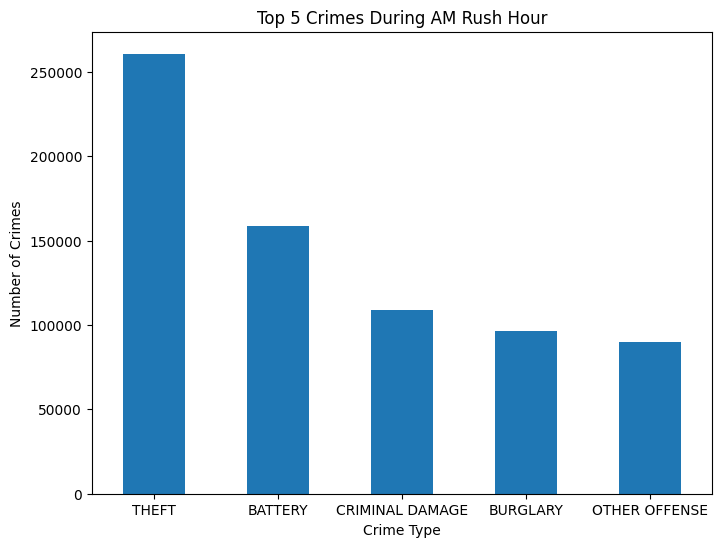

In [36]:
# Top 5 AM crimes
plt.figure(figsize=(8, 6))
top_am_crimes.plot(kind='bar')

plt.title('Top 5 Crimes During AM Rush Hour')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')
plt.xticks(rotation=0)

plt.show()

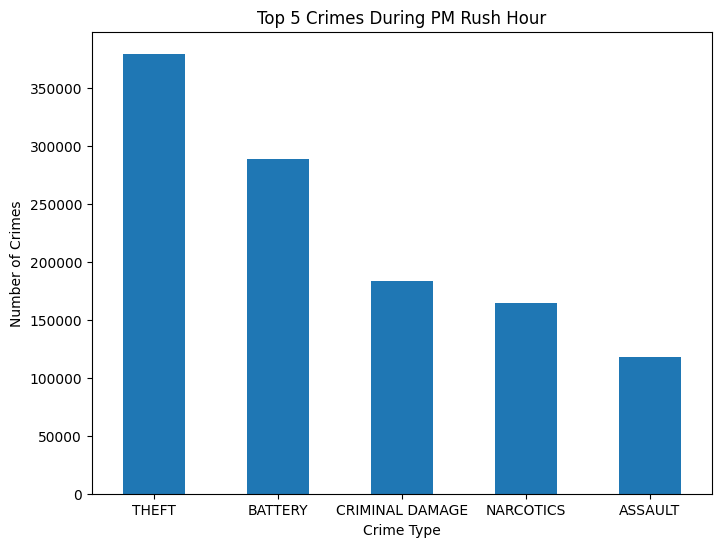

In [37]:
# Top 5 PM crimes
plt.figure(figsize=(8, 6))
top_pm_crimes.plot(kind='bar')

plt.title('Top 5 Crimes During PM Rush Hour')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')
plt.xticks(rotation=0)

plt.show()

In [28]:
motor_vehicle_am = am_rush_crimes[am_rush_crimes['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
motor_vehicle_pm = pm_rush_crimes[pm_rush_crimes['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

print("Motor Vehicle Thefts during AM Rush Hour:", motor_vehicle_am)
print("Motor Vehicle Thefts during PM Rush Hour:", motor_vehicle_pm)

Motor Vehicle Thefts during AM Rush Hour: 54035
Motor Vehicle Thefts during PM Rush Hour: 74678


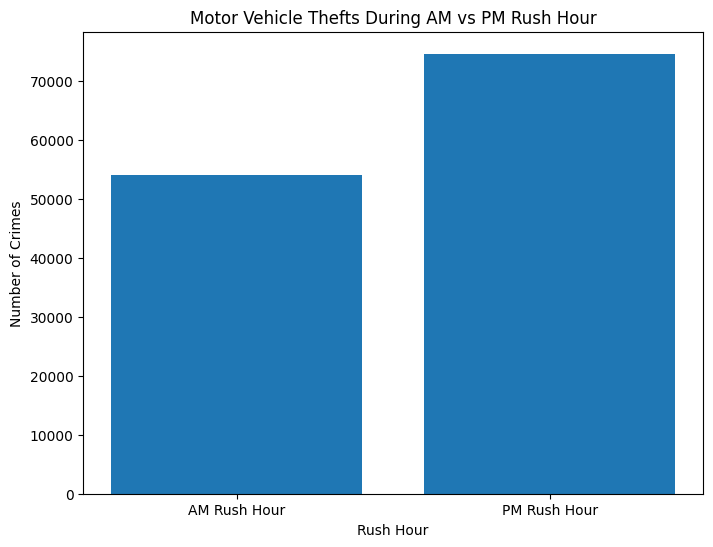

In [38]:
# Motor vehicle thefts during AM and PM
motor_vehicle_totals = [motor_vehicle_am, motor_vehicle_pm]
labels = ['AM Rush Hour', 'PM Rush Hour']

plt.figure(figsize=(8, 6))
plt.bar(labels, motor_vehicle_totals)

plt.title('Motor Vehicle Thefts During AM vs PM Rush Hour')
plt.ylabel('Number of Crimes')
plt.xlabel('Rush Hour')

plt.show()